In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def numerical_gradient(f, x):
  delta_x = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx] #x is mutable
    x[idx] = float(tmp_val) + delta_x #f(x + del_x)
    fx1 =f(x)

    x[idx] = tmp_val - delta_x
    fx2 = f(x)                      #f(x - del_x)
    grad[idx] = (fx1 - fx2) / (2*delta_x)

    x[idx] = tmp_val #변했던 x를 임시변수 tmp_val로 다시 넣어주기

  return grad

def loss_func(x, t):
  y = np.dot(x,W) + b
    
  return (np.sum((t-y)**2) / (len(x)))

def error_val(x, t):
  y = np.dot(x,W) + b
    
  return (np.sum((t-y)**2) / (len(x)))

#오차가 가장 작게 나온 상태에서의 W,b
def predict(x):
  y = np.dot(x,W) + b 

  return y

In [ ]:
# (참고) 다변수함수의 수치미분 적용
def func1(input):
  x = input[0]
  y = input[1]
  z = input[2]
  
  return (2*x + np.power(y,4) + x*z)

input = np.array([1.0, 3.0, 1.0])
numerical_gradient(func1, input) 

In [63]:
#1.입력데이터와 정답레이블 만들기
x_data = np.array([1,2,3,4,5,6,7,8]).reshape(8,1)
t_data = np.array([3,5,7,10,14,19,25,34]).reshape(8,1)

training_data = np.concatenate((x_data, t_data), axis = 1)

In [64]:
#2. 경사하강법 적용(학습률: 0.01)
W = np.random.rand(1,1)
b = np.random.rand(1)
lr = 1e-2

f = lambda x : loss_func(x_data, t_data)

for step in range(1000):
  
  W -= lr*numerical_gradient(f,W)

  b -= lr*numerical_gradient(f,b)

  if(step % 100 == 0):
    print("setp:{0:>4d}, error_value:{1:>10.6f}, W:{2}, b:{3}".format(step,\
                error_val(x_data, t_data), W, b))
    

setp:   0, error_value: 94.467419, W:[[1.49502485]], b:[0.95373951]
setp: 100, error_value:  9.676458, W:[[3.53596203]], b:[-0.51644316]
setp: 200, error_value:  7.893766, W:[[3.76841017]], b:[-1.81333677]
setp: 300, error_value:  7.082962, W:[[3.92516132]], b:[-2.68789561]
setp: 400, error_value:  6.714164, W:[[4.03086629]], b:[-3.27765343]
setp: 500, error_value:  6.546396, W:[[4.10214833]], b:[-3.675356]
setp: 600, error_value:  6.470064, W:[[4.1502173]], b:[-3.9435463]
setp: 700, error_value:  6.435325, W:[[4.18263255]], b:[-4.12440015]
setp: 800, error_value:  6.419509, W:[[4.20449175]], b:[-4.24635875]
setp: 900, error_value:  6.412305, W:[[4.21923247]], b:[-4.3286014]


In [65]:
#3. 미지의 데이터 값 넣기
print(predict(10))

[[37.90730774]]


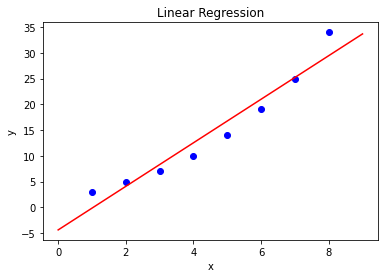

In [70]:
#그래프 그려보기

x  = np.arange(0,10)
y = (W*x + b).T

plt.scatter(x_data,t_data, color = 'b', marker ='o')
plt.plot(x,y, color = 'r')

plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
#3의 결과값(y)은 빨간선 위에 있을 것이다.

plt.show()
